## Python/ML Interview Questions


### Debug Random Forest

Context: After watching your Random Forest lecture one of your students decides to play with the sklearn's Random Forest Classifier using the iris dataset.

They find that the results are poor, and are really confused why, playing with parameters hasn't helpped much and they were expecting to get accuracy scores similar to lecture. 

In [40]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()


X, y = iris.data, iris.target

X_train, X_test, y_test, y_train = \
        train_test_split(X, y, test_size=0.5, random_state=42)

rf_model = RandomForestClassifier(n_estimators=10, max_depth = 2, random_state=42)
rf_model.fit(X_train, y_train)

print('Training set accuracy:  ', rf_model.score(X_train, y_train))
print('Validation set accuracy:', rf_model.score(X_test, y_test))

Training set accuracy:   0.5466666666666666
Validation set accuracy: 0.3466666666666667


### Debug Pandas


Your student is working with this dataframe shown below. They were instructed to first, filter their data frame to return movies that had a world wide gross of over 20 Million Dollars and were then instructed to filter their dataframe of movies down to only the movies that received the highest rankings. They successfully performed the first filter but are getting errors on the second; aid them in figuring out what is going on here.

In [33]:
import pandas as pd
df_movies = pd.DataFrame({'userID':  ['U2724', 'UA28B',   'UB1811', 'U781',  'UA28B'],
                          'movieID': ['M273L', 'MI5722L', 'M273P',  'M273L', 'M273P'],
                          'worldwide_gross' : [19.62, 26.66, 41.94, 0.03, 34.76],
                          'rank':    [3,       4,         1,      5,     2]})

profitable_movies = df_movies[df_movies.worldwide_gross >= 20]
profitable_movies

,userID,movieID,worldwide_gross,rank
1,UA28B,MI5722L,26.66,4
2,UB1811,M273P,41.94,1
4,UA28B,M273P,34.76,2


In [34]:
good_movies = df_movies[df_movies.rank <= 2]

good_movies

TypeError: '<=' not supported between instances of 'method' and 'int'

### Debug Linear Regression

Context: Students are asked to play around with sklearns linear regression class to predict housing prices from the Boston Dataset. They are first asked to fit a model only using the feature, "RM". This would predict price of the house soley on the average number of rooms per dwelling. 

They keep getting an error and cannot seem to get past it; aid them in solving this issue. 

In [48]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

boston = load_boston()
housing_df = pd.DataFrame(boston.data, columns=boston.feature_names)
housing_df['target'] = pd.Series(boston.target)
housing_df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [71]:
X = housing_df.RM

y = housing_df.target

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_train, y_train), linear_model.score(X_test, y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[6.43  6.176 5.682 5.935 5.926 6.398 6.998 5.683 6.153 5.741 6.195 6.376
 5.56  6.674 8.398 6.185 5.813 6.172 5.983 6.474 5.85  6.943 6.437 5.872
 6.254 6.546 7.178 6.538 4.903 4.906 5.52  6.212 6.826 6.951 6.749 5.019
 6.683 5.878 6.251 6.319 5.569 5.887 5.987 6.8   6.718 6.229 6.411 6.13
 6.442 5.012 6.879 7.236 6.167 6.433 6.101 8.375 6.975 7.412 6.273 6.122
 6.525 8.259 5.731 7.088 6.495 5.762 6.395 5.349 7.686 7.52  7.358 4.652
 6.484 5.841 7.287 6.151 4.97  6.226 6.209 6.38  5.927 6.715 7.079 7.014
 6.012 8.78  6.976 7.241 6.066 6.122 6.315 5.747 5.604 6.382 6.377 4.368
 6.137 6.619 5.966 5.782 5.877 6.162 7.041 6.549 7.274 6.794 5.628 6.405
 4.926 6.193 6.565 5.856 5.093 6.163 5.468 6.606 6.854 8.069 6.728 5.961
 6.563 7.61  6.108 5.871 6.59  5.663 5.757 5.852 6.23  5.986 6.616 6.618
 5.648 6.373 5.637 5.565 7.148 5.706 6.968 6.242 6.127 5.79  6.009 7.016
 5.935 5.913 6.98  4.973 6.54  6.316 5.905 5.936 8.247 6.567 5.854 5.942
 7.107 7.333 8.337 5.928 5.87  5.884 8.266 4.138 5.968 5.693 6.453 6.434
 6.127 4.138 6.417 5.822 3.863 6.069 5.67  6.29  7.923 6.63  6.358 7.831
 5.896 6.51  5.889 5.933 6.495 5.875 5.403 6.404 6.939 6.164 6.625 6.115
 6.897 6.649 5.536 6.86  6.77  5.818 6.051 6.326 7.645 6.108 6.782 7.147
 7.454 7.393 6.727 8.04  6.833 6.375 5.837 5.88  7.82  6.63  6.182 5.966
 6.03  5.95  8.297 6.083 7.135 6.655 6.047 6.193 5.981 7.203 6.315 7.802
 6.38  5.857 6.456 6.335 6.431 7.061 5.631 6.312 5.713 7.104 6.871 6.096
 5.272 7.024 6.223 5.759 5.608 5.888 6.812 5.627 6.794 5.895 6.631 5.783
 5.807 6.678 6.317 6.438 5.926 6.209 6.982 6.49  5.92  6.162 7.489 6.211
 6.642 6.343 6.951 5.972 6.842 5.851 5.998 5.39  6.421 6.341 5.454 5.602
 6.824 6.727 5.891 6.096 6.348 7.327 6.202 4.963 6.405 5.985 6.229 6.511
 6.014 7.206 6.095 5.949 5.705 7.007 5.    7.691 7.929 5.868 6.019 5.757
 7.42  6.114 6.113 6.393 5.888 5.803 5.963 6.376 5.859 6.459 7.185 6.12
 6.513 6.782 6.402 6.145 5.399 6.874 6.086 6.957 5.965 6.266 6.081 6.25
 7.267 6.485 6.739 5.277 6.127 5.155 6.696 8.704 6.635 5.597 6.458 5.404
 6.112 7.416 5.875 6.121 6.301 6.144 5.412 5.952 6.004 6.03  5.57  6.556
 5.961 5.836 5.856 6.635 6.629 6.405].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Why Am I getting a small P_value?
Students are asked to look at the click through rates of users and determine if the rates between male users and female users are statistically different. They are asked to only use only the rows where the users are signed in.

A student seems to be flying through the assignment but when they begin investigating the graphs after getting a small p_value, they are concerned they have made some mistakes. They are expecting graphs similar to what they saw in class if you get a small p_value. 


In [193]:
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

nyt_ctr_df = pd.read_csv('data/nyt1.csv')
nyt_ctr_df['CTR'] = nyt_ctr_df.Clicks / nyt_ctr_df.Impressions

# Want to filter out any records with 0 impressioins
nyt_ctr_df = nyt_ctr_df[nyt_ctr_df.Impressions != 0].copy()

#Get only the users that are signed in 
ctr_signed_in = nyt_ctr_df[nyt_ctr_df.Signed_In == 1].copy()
ctr_not_signed_in = nyt_ctr_df[nyt_ctr_df.Signed_In == 0].copy()

#split genders into their own Dfs
male_ctr = ctr_signed_in[ctr_signed_in.Gender == 1]
female_ctr = ctr_signed_in[ctr_signed_in.Gender == 0]

In [199]:
# Null Hypothesis: click through rates between male users and female users are not statistically different.
stat, p_val = stats.ttest_ind(male_ctr.CTR, female_ctr.CTR, equal_var=False)
print('The test statistic is: {} \nThe P-value is: {}'.format(stat ,p_val))

The test statistic is: -3.289756065935106 
The P-value is: 0.0010028527313147612


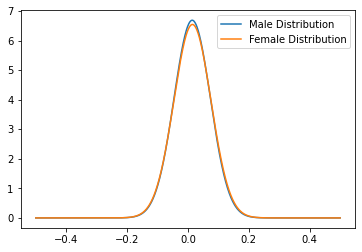

In [217]:
male_ctr_mean, male_ctr_std = male_ctr.CTR.mean(), np.std(male_ctr.CTR)
female_ctr_mean, female_ctr_std = female_ctr.CTR.mean(), np.std(female_ctr.CTR)
m_norm = stats.norm(male_ctr_mean, male_ctr_std)
f_norm = stats.norm(female_ctr_mean, female_ctr_std)

x = np.linspace(-0.5,0.5, 1000)

fig, ax = plt.subplots(1)
ax.plot(x, m_norm.pdf(x), label = 'Male Distribution')
ax.plot(x, f_norm.pdf(x), label = 'Female Distribution')

ax.legend();